### End 2 End NLP Project
+ Emotion Detection In Text
+ Text Classifier

In [33]:
# Load EDA Pkgs
import pandas as pd
import numpy as np
import pickle

In [34]:
# Load Data Viz Pkgs
import seaborn as sns

In [35]:
# Load Text Cleaning Pkgs
import neattext.functions as nfx

In [36]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [37]:
df = pd.read_csv("D:/New folder/EmotionNLP/data/dasetEmotion.csv", )

In [38]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_text
0,1,senang,Pelayanannya sangat memuaskan.,pelayanannya sangat memuaskan
1,2,puas,Proses administrasinya cepat dan mudah.,proses administrasi cepat mudah
2,3,biasa saja,Tidak ada yang istimewa dari pelayanannya.,tidak ada yang istimewa pelayanannya
3,4,kesal,Pelayanannya sangat lambat dan tidak responsif.,pelayanannya sangat lambat tidak responsif
4,5,kecewa,Kualitas layanan menurun drastis.,kualitas layanan menurun drastis


In [39]:

df.columns = df.columns.str.strip()

In [40]:
df['Text'].value_counts()

Text
 Sangatkecewa dengan penanganan administrasi yang lambat.                                          41
 Tata usaha kampus kurang responsif dan membuatkesal.                                              40
 Pelayanan sangat baik dan memuaskan.                                                              25
senang dengan respons cepat dari tata usaha kampus.                                                23
 Pelayanan tata usaha kampusbiasa saja tidak ada yang istimewa.                                    23
                                                                                                   ..
 Sayasenang dengan sistem pelayanan yang efisien dan teratur di tata usaha kampus.                  1
 Pelayanan tata usaha kampus sangat membantu dan solutif dalam menangani permasalahan akademik.     1
 Saya merasa kecewa  dengan kurangnya informasi yang disediakan oleh tata usaha kampus.             1
 Sayakesal karena tata usaha kampus seringkali lambat dalam mengurus izin stu

In [41]:
# Value Counts
df['Emotion'].value_counts()

Emotion
puas          334
kesal         329
kecewa        322
senang        218
biasa saja    196
sedih         121
 sedih          1
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

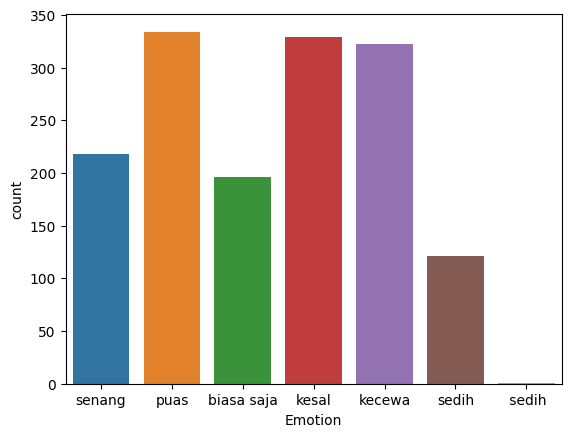

In [42]:
# Plot
sns.countplot(x='Emotion',data=df)

In [43]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [44]:
# User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [45]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [46]:
df

,Unnamed: 0,Emotion,Text,Clean_text,Clean_Text
0,1,senang,Pelayanannya sangat memuaskan.,pelayanannya sangat memuaskan,Pelayanannya sangat memuaskan.
1,2,puas,Proses administrasinya cepat dan mudah.,proses administrasi cepat mudah,Proses administrasinya cepat dan mudah.
2,3,biasa saja,Tidak ada yang istimewa dari pelayanannya.,tidak ada yang istimewa pelayanannya,Tidak ada yang istimewa dari pelayanannya.
3,4,kesal,Pelayanannya sangat lambat dan tidak responsif.,pelayanannya sangat lambat tidak responsif,Pelayanannya sangat lambat dan tidak responsif.
4,5,kecewa,Kualitas layanan menurun drastis.,kualitas layanan menurun drastis,Kualitas layanan menurun drastis.
...,...,...,...,...,...
1516,1517,kecewa,Saya merasa kecewa karena tata usaha kampus ...,Saya merasa kecewa karena tata usaha kampus ...,Saya merasa kecewa karena tata usaha kampus te...
1517,1518,kesal,Saya merasa kesal karena tata usaha kampus ti...,Saya merasa kesal karena tata usaha kampus ti...,Saya merasa kesal karena tata usaha kampus tid...
1518,1519,kecewa,Saya merasa kecewa karena tata usaha kampus ...,Saya merasa kecewa karena tata usaha kampus ...,Saya merasa kecewa karena tata usaha kampus ti...
1519,1520,kesal,Saya merasa kesal karena tata usaha kampus ti...,Saya merasa kesal karena tata usaha,Saya merasa kesal karena tata usaha kampus tid...


In [47]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [48]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [49]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [50]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [51]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [52]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [53]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.9912472647702407

In [59]:
# Make A Prediction
ex1 = "Pelayanan nya bagus"

In [55]:
pipe_lr.predict([ex1])

array(['puas'], dtype=object)

In [56]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[0.18469655, 0.05845191, 0.04789601, 0.38737586, 0.01131037,
        0.31026931]])

In [57]:
# To Know the classes
pipe_lr.classes_

array(['biasa saja', 'kecewa', 'kesal', 'puas', 'sedih', 'senang'],
      dtype=object)

In [58]:
# Save Model & Pipeline
import joblib
pipeline_file = open("emotiondetector5.pickle","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()